76020


,organization_id,StatementDetails.FinancialPeriodFiscalYear,EmissionDataPoints.CO2EquivalentsEmissionDirectScope1
0,66,2009,83134.00
1,66,2010,53354.10
2,66,2011,79268.75
3,66,2012,NaN
4,66,2013,NaN
5,66,2014,NaN
6,66,2015,NaN
7,66,2016,127.00
8,66,2017,156.00
9,66,2018,569.00


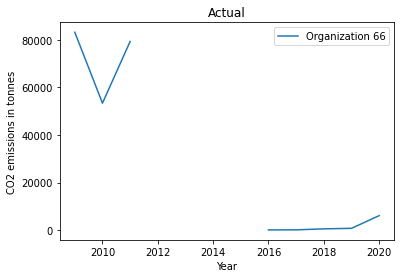

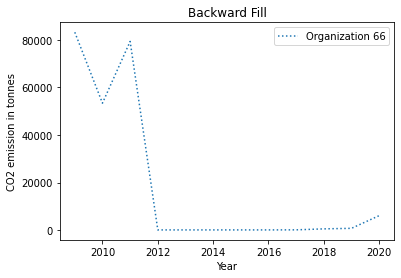

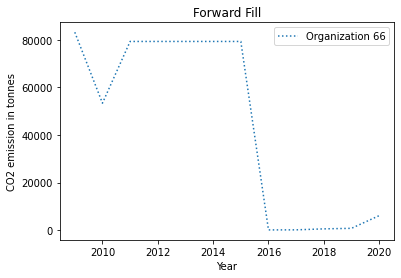

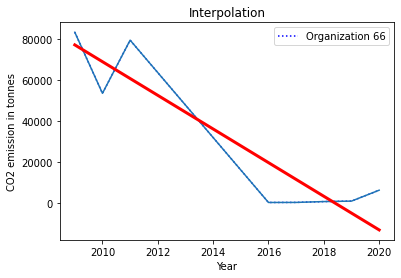

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [90]:
import pandas as pd 

#open dataset
df0 = pd.read_csv("20220105_company_emissions_data.csv", sep=',')

#drop irrelevant columns from dataset
df1 = df0.drop(columns=['WorkforceDataPoints.AsianMinoritiesEmployeesPercent',
                       'WorkforceDataPoints.AsianMinoritiesManagersPercent', 
                      'WorkforceDataPoints.AverageEmployeeLengthOfService',
                      'WorkforceDataPoints.AverageTrainingHours', 
                      'WorkforceDataPoints.BbbeeLevel', 
                      'WorkforceDataPoints.BlackOrAfricanAmericanMinoritiesEmployeesPercent',
                      'WorkforceDataPoints.BlackOrAfricanAmericanMinoritiesManagersPercent',
                      'WorkforceDataPoints.ContractorAccidents',
                      'WorkforceDataPoints.ContractorFatalities',
                      'WorkforceDataPoints.ContractorLostWorkingDays',
                      'WorkforceDataPoints.DayCareServices',
                      'WorkforceDataPoints.DiversityAndOpportunityControversies',
                      'WorkforceDataPoints.EmployeeAccidents',
                      'WorkforceDataPoints.EmployeeFatalities',
                      'WorkforceDataPoints.EmployeeHealthAndSafetyTrainingHours',
                      'WorkforceDataPoints.EmployeeLostWorkingDays',
                      'WorkforceDataPoints.EmployeeResourceGroups',
                      'WorkforceDataPoints.EmployeeSatisfaction',
                      'WorkforceDataPoints.EmployeesHealthAndSafetyControversies',
                      'WorkforceDataPoints.EmployeesHealthAndSafetyOhsas18001',
                      'WorkforceDataPoints.EmployeesHealthAndSafetyTeam',
                      'WorkforceDataPoints.EmployeesWithDisabilities',
                      'WorkforceDataPoints.FlexibleWorkingHours',
                      'WorkforceDataPoints.GenderPayGapPercentage',
                      'WorkforceDataPoints.HealthAndSafetyTraining',
                      'WorkforceDataPoints.HispanicOrLatinoMinoritiesEmployeesPercent',
                      'WorkforceDataPoints.HispanicOrLatinoMinoritiesManagersPercent',
                      'WorkforceDataPoints.HivAidsProgram',
                      'WorkforceDataPoints.HrcCorporateEqualityIndex',
                      'WorkforceDataPoints.HsmsCertifiedPercentage',
                      'WorkforceDataPoints.InternalPromotion',
                      'WorkforceDataPoints.InvoluntaryTurnoverOfEmployees',
                      'WorkforceDataPoints.LostTimeInjuryRateContractors',
                      'WorkforceDataPoints.LostTimeInjuryRateEmployees',
                      'WorkforceDataPoints.LostTimeInjuryRateTotal',
                      'WorkforceDataPoints.LostWorkingDays',
                      'WorkforceDataPoints.ManagementDepartures',
                      'WorkforceDataPoints.ManagementTraining',
                      'WorkforceDataPoints.MinoritiesEmployeesPercent',
                      'WorkforceDataPoints.MinoritiesManagersPercent',
                      'WorkforceDataPoints.MinoritiesSalaryGapPercent',
                      'WorkforceDataPoints.NewWomenEmployees',
                      'WorkforceDataPoints.NumberOfEmployeesFromCsrReporting',
                      'WorkforceDataPoints.OccupationalDiseases',
                      'WorkforceDataPoints.OtherMinoritiesEmployeesPercent',
                      'WorkforceDataPoints.OtherMinoritiesManagersPercent',
                      'WorkforceDataPoints.PolicyCareerDevelopment',
                      'WorkforceDataPoints.PolicyDiversityAndOpportunity',
                      'WorkforceDataPoints.PolicyEmployeeHealthAndSafety',
                      'WorkforceDataPoints.PolicySkillsTraining',
                      'WorkforceDataPoints.PolicySupplyChainHealthAndSafety',
                      'WorkforceDataPoints.RecentDiversityOpportunityControversies',
                      'WorkforceDataPoints.RecentEmployeeHealthAndSafetyControversies',
                      'WorkforceDataPoints.RecentWagesWorkingConditionControversies',
                      'WorkforceDataPoints.SalariesAndWagesFromCsrReporting',
                      'WorkforceDataPoints.Strikes',
                      'WorkforceDataPoints.SupplierESGTraining',
                      'WorkforceDataPoints.SupplyChainHealthAndSafetyImprovements',
                      'WorkforceDataPoints.SupplyChainHealthAndSafetyTraining',
                      'WorkforceDataPoints.TargetsDiversityAndOpportunity',
                      'WorkforceDataPoints.TotalInjuryRateContractors',
                      'WorkforceDataPoints.TotalInjuryRateEmployees',
                      'WorkforceDataPoints.TotalInjuryRateTotal',
                      'WorkforceDataPoints.TradeUnionRepresentation',
                      'WorkforceDataPoints.TrainingCostsTotal',
                      'WorkforceDataPoints.TrainingHoursTotal',
                      'WorkforceDataPoints.TurnoverOfEmployees',
                      'WorkforceDataPoints.VoluntaryTurnoverOfEmployees',
                      'WorkforceDataPoints.WagesWorkingConditionControversiesCount',
                      'WorkforceDataPoints.WhiteMinoritiesEmployeesPercent',
                      'WorkforceDataPoints.WhiteMinoritiesManagersPercent',
                      'WorkforceDataPoints.WomenEmployees',
                      'WorkforceDataPoints.WomenManagers',
                      'WorkforceIndicators.AnnouncedLayOffsToTotalEmployees',
                      'WorkforceIndicators.HealthAndSafetyPolicy',
                      'WorkforceIndicators.InjuriesToMillionHours',
                      'WorkforceIndicators.LostDaysToTotalDays',
                      'WorkforceIndicators.NetEmploymentCreation',
                      'WorkforceIndicators.SalaryGap',
                      'WorkforceIndicators.TrainingAndDevelopmentPolicy',
                      'WorkforceIndicators.TrainingCostsPerEmployee',
                      'WorkforceIndicators.WagesWorkingConditionControversies'],
                      axis=1)
    
#number of columns in (cleaned) dataset
len(df0.columns)
len(df1.columns)

#save cleaned dataset as new file
df2 = df1.to_csv('company_emissions_cleaned.csv', index=True)
df3 = pd.read_csv("company_emissions_cleaned.csv", sep=',')


from scipy.interpolate import interp1d
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

scope_values = df3['EmissionDataPoints.CO2EquivalentsEmissionDirectScope1']
print(scope_values.isnull().sum())

df_numeric = df3.apply(pd.to_numeric, args=('coerce',))

df = df_numeric.sort_values(by='StatementDetails.FinancialPeriodFiscalYear')

df5 = df.loc[df["organization_id"] == 66]

emissions_per_company = df5.groupby(["organization_id", "StatementDetails.FinancialPeriodFiscalYear"])[["EmissionDataPoints.CO2EquivalentsEmissionDirectScope1"]].sum(min_count=1).reset_index()

#zeroes = df[df.isna().any(axis=1)]
#display(zeroes[["organization_id", "StatementDetails.FinancialPeriodFiscalYear",'EmissionDataPoints.CO2EquivalentsEmissionDirectScope1']])

display(emissions_per_company)


#Actual
emissions_per_company.plot(x = 'StatementDetails.FinancialPeriodFiscalYear',
        y = 'EmissionDataPoints.CO2EquivalentsEmissionDirectScope1', title='Actual', xlabel='Year', ylabel='CO2 emissions in tonnes', label='Organization 66')

#Backward fill
df_bf = emissions_per_company.bfill(axis = 0)

df_bf.plot(x = 'StatementDetails.FinancialPeriodFiscalYear', 
        y = 'EmissionDataPoints.CO2EquivalentsEmissionDirectScope1', title='Backward Fill', linestyle='dotted', xlabel='Year', ylabel='CO2 emission in tonnes', label='Organization 66')

#Forward fill
df_ff = emissions_per_company.ffill(axis = 0)

df_ff.plot(x = 'StatementDetails.FinancialPeriodFiscalYear', 
        y = 'EmissionDataPoints.CO2EquivalentsEmissionDirectScope1', title='Forward Fill', linestyle='dotted', xlabel='Year', ylabel='CO2 emission in tonnes', label='Organization 66')

#Interpolation
df_int = emissions_per_company.interpolate(axis = 0)

df_int.plot(x = 'StatementDetails.FinancialPeriodFiscalYear', 
        y = 'EmissionDataPoints.CO2EquivalentsEmissionDirectScope1', title='Interpolation', color='blue', linestyle='dotted', xlabel='Year', ylabel='CO2 emission in tonnes', label='Organization 66')

from sklearn import linear_model

df_int = df_int.rename(columns={'EmissionDataPoints.CO2EquivalentsEmissionDirectScope1': 'scope', 'StatementDetails.FinancialPeriodFiscalYear': "year"})

y = df_int.scope.values
x = df_int.year.values

length = len(df_int) 
x = x.reshape(length, 1)   
y = y.reshape(length, 1)

reg = linear_model.LinearRegression()
reg = reg.fit(x,y)

plt.plot(x,y)
plt.plot(x, reg.predict(x), color='red', linewidth=3)
plt.show()

from sklearn import metrics

#MSE
error = np.round(mean_squared_error(emissions_per_company['EmissionDataPoints.CO2EquivalentsEmissionDirectScope1'], df_int['scope']), 2)
print(error)
